In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import os
import shutil
import time

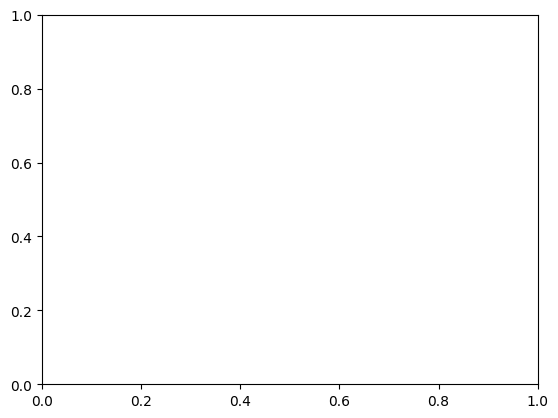

In [48]:
fig,ax = plt.subplots()

# Plot state u(x, tmax) AND tanh with its measured height and width

0.2831059560900878
616


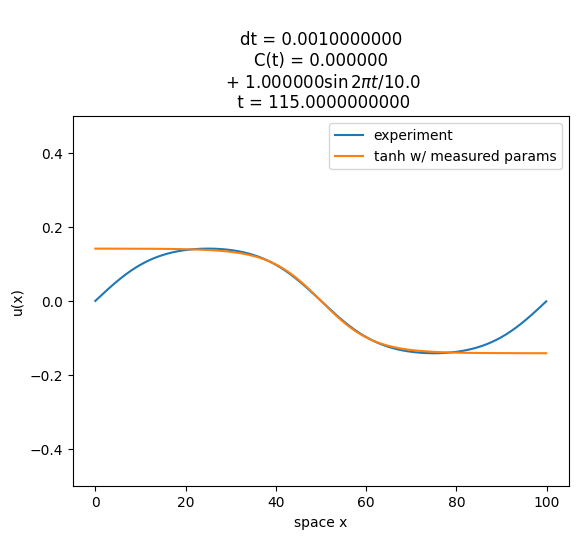

In [49]:
f = open("../../tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")

    i = i + 1

x = x[0:i-1]
y = y[0:i-1]
T = 2*float(Thalf)

imin = int(xmin/dx)
imax = int(xmax/dx)
if xmin < 0:
    imin = 0
if xmax > L or xmax < 0:
    imax = i

#eps = 0.5
ax.plot(x,y,label="experiment")
#ax.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
label = label + "\n t = " + tmax
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"
ax.set_title(label)

L = 100
# Measure height and width
# Height
i_height = int(len(x)/4)                           # CKECK w/ plot if there is Plateau at x=L/4 !!!
height = 2*np.abs(y[i_height])
print(height)
# Width
i_width = int(len(x)/2)
while np.abs(y[i_width]) < (height/2)*np.tanh(1) and i_width < len(x):
    #print(np.abs(y[i_width])-(height/2)*np.tanh(1))
    i_width = i_width + 1
if i == len(x)-1:
    print("Error")
else:
    width = 2*(x[i_width]-L/2)
    print(i_width)
    # Tanh
    y = -height/2*np.tanh((x-L/2)/(width/2))
    ax.plot(x,y,label="tanh w/ measured params")

    ax.set_xlabel("space x")
    ax.set_ylabel("u(x)")
    eps = 0.5
    ax.set_ylim(-np.sqrt(float(Cave))-eps,np.sqrt(float(Cave))+eps)

ax.legend()
fig